## Final Project Submission

Please fill out:
* Student name: Allen Muraya Maina
* Student pace: full time
* Scheduled project review date/time: 1st November 2023
* Instructor name: Nikita Njoroge, Lucille Kaleha, Diana Mongina.
* Blog post URL:


# Tanzanian Water Wells

# Introduction

## The features in this dataset
Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

* amount_tsh - Total static head (amount water available to waterpoint)
* date_recorded - The date the row was entered
* funder - Who funded the well
* gps_height - Altitude of the well
* installer - Organization that installed the well
* longitude - GPS coordinate
* latitude - GPS coordinate
* wpt_name - Name of the waterpoint if there is one
* basin - Geographic water basin
* subvillage - Geographic location
* region - Geographic location
* region_code - Geographic location (coded)
* district_code - Geographic location (coded)
* lga - Geographic location
* ward - Geographic location
* population - Population around the well
* public_meeting - True/False
* recorded_by - Group entering this row of data
* scheme_management - Who operates the waterpoint
* scheme_name - Who operates the waterpoint
* permit - If the waterpoint is permitted
* construction_year - Year the waterpoint was constructed
* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed
* payment - What the water costs
* payment_type - What the water costs
* water_quality - The quality of the water
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint

# Data understanding & Preparation

I've obtained this data from the Tanzanian Ministry of Water and put together by Taarifa. My goal is to ensure the accuracy of our model based on the current dataset through techniques of data analysis. This will help the Tanzanian government by enabling them to predict the functional status of water pumps using newly collected data and make repairs to the non-functional units.

## Import Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load datasets
df_training_values = pd.read_csv('Training_set_values.csv')
df_training_labels = pd.read_csv('Training_set_labels.csv')

In [3]:
#Print first five rows of data
df_training_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
df_training_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
#Merge the datasets
df_training_values.set_index('id', inplace = True)
df_training_labels.set_index('id', inplace = True)
df = pd.merge(df_training_values, df_training_labels, how = 'inner', left_index = True, right_index = True)
df.reset_index(inplace = True)

## List the columns

In [6]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

# Data cleaning

Data Cleaning will be performed on columns that we will find relevant to our data analysis.

### Drop Duplicates

In [7]:
#Drop Duplicate 
df.drop_duplicates(inplace = True)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### Inspect data types in the columns

In [8]:
#Inspect data types in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [9]:
#Inspect Null values
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

* There are some null values that pose to be challenge in carrying out this project. Dropping these values will help make my work that much easier.
* There are also several columns with missing values and unnecessary duplicated columns.

### Inspecting Status related columns

In [10]:
df['status_group'].value_counts()

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

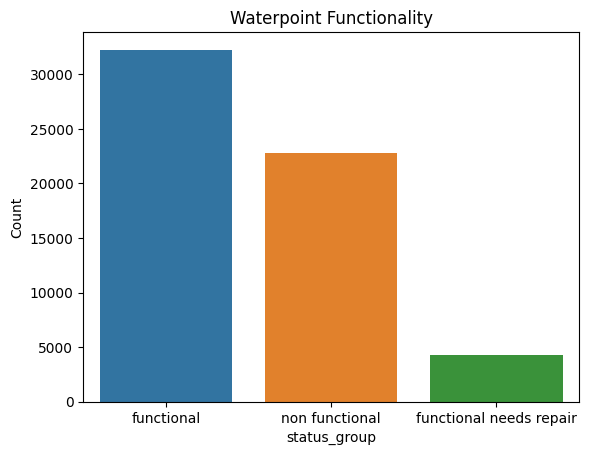

In [11]:

fig, ax = plt.subplots()
sns.barplot(x = df['status_group'].value_counts().index, y = df['status_group'].value_counts(), ax=ax)
ax.set_title('Waterpoint Functionality')
ax.set_ylabel('Count')
plt.show()

### Inspecting construction_year column

In [12]:
df['construction_year'].value_counts()

construction_year
0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: count, dtype: int64

In [13]:
# Create new column decade
df['decade'] = df['construction_year'] 

In [14]:
# Categorizing the new column decade

df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [15]:
df['decade'].value_counts()

decade
0      20709
00s    15330
90s     7678
80s     5578
10s     5161
70s     4406
60s      538
Name: count, dtype: int64

In [16]:
df.loc[df['construction_year']!=0].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000
mean,37083.008736,466.457534,1002.367760,35.983262,-6.235372,0.707710,15.706495,5.969786,269.799617,1996.814686
std,21420.922010,3541.036030,618.078669,2.558709,2.761317,15.083957,21.003006,10.700673,552.343746,12.472045
min,1.000000,0.000000,-63.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,0.000000,1960.000000
25%,18489.500000,0.000000,372.000000,34.676719,-8.755274,0.000000,4.000000,2.000000,30.000000,1987.000000
50%,37078.000000,0.000000,1154.000000,36.648187,-6.064216,0.000000,11.000000,3.000000,150.000000,2000.000000
75%,55514.500000,200.000000,1488.000000,37.803940,-3.650661,0.000000,16.000000,5.000000,305.000000,2008.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-1.042375,1776.000000,99.000000,63.000000,30500.000000,2013.000000


In [17]:
# Handling the missing values in construction year column
df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)

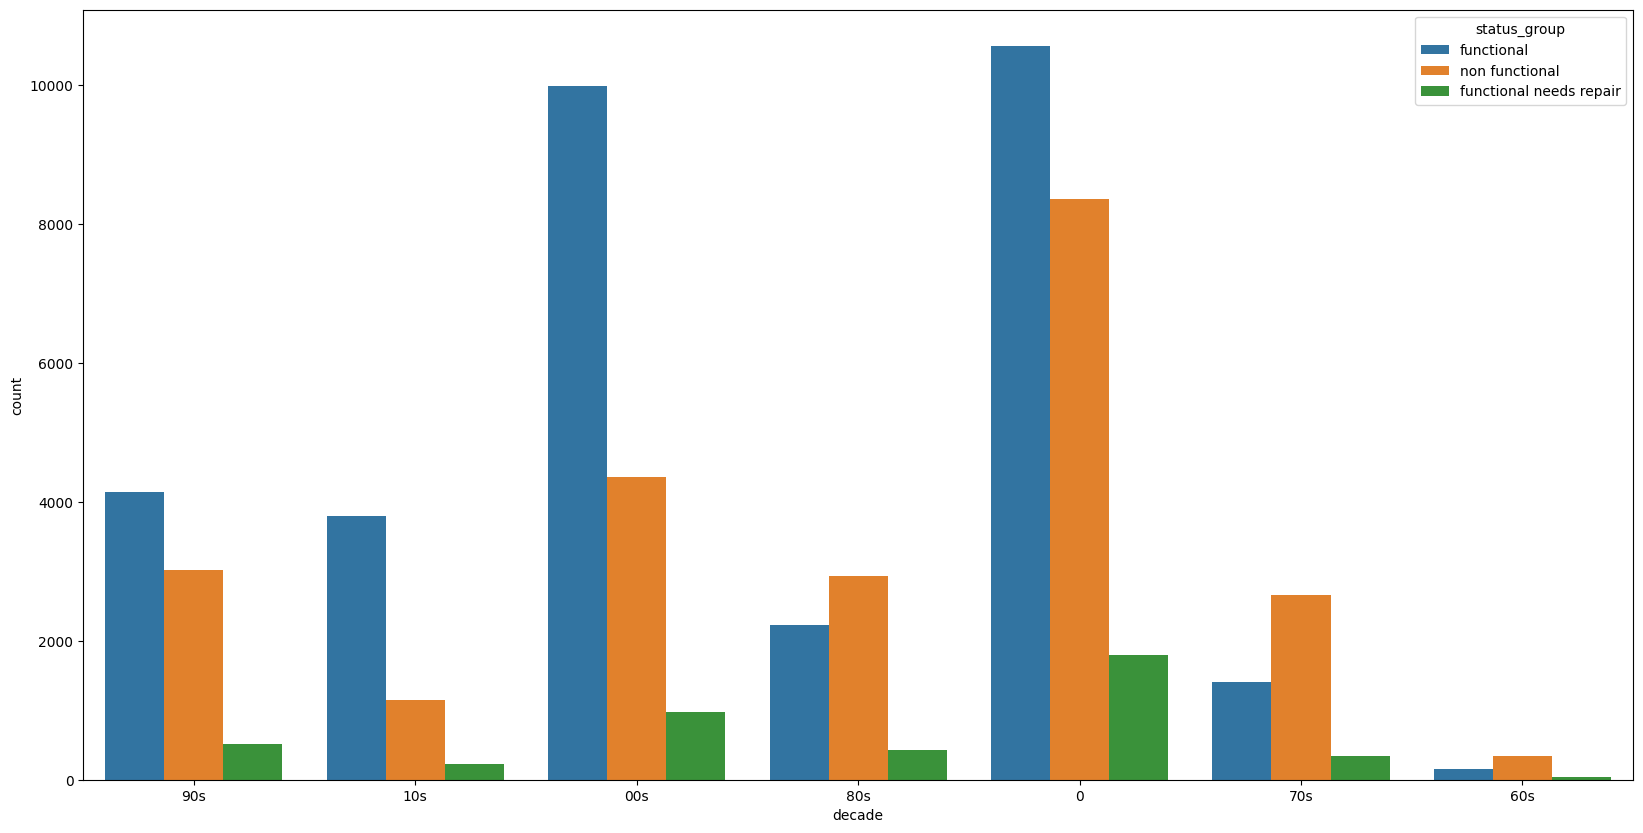

In [18]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='decade', hue="status_group", data=df)

The plot shows the distribution of the construction years on the water wells. We observe that wells dug in the 00s remain the most functional to date. However, Wells constructed in the 60s are represent the fewest functional wells. We will continue to analyze this data to gain more insights. 

### Inspecting the Installer column

In [19]:
#Handling null values
df['installer'].fillna(value='Unknown',inplace=True)

In [20]:
df['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) # filling 0 values with unknown

In [21]:
df['installer'].value_counts().head(15)

installer
DWE                   17402
Unknown                4435
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
Name: count, dtype: int64

### Inspecting the recorded_by column

In [22]:
df['recorded_by'].value_counts()

recorded_by
GeoData Consultants Ltd    59400
Name: count, dtype: int64

In [23]:
#Drop column as it is irrelevant to study
df.drop(columns=['recorded_by'],inplace=True )

### Inspecting source related columns

For instance we have the 'source', 'source_type' and 'source_class_columns. Let us inspect these columns.

In [24]:
df['source'].value_counts()

source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: count, dtype: int64

In [25]:
df['source_type'].value_counts()

source_type
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: count, dtype: int64

In [26]:
df['source_class'].value_counts()

source_class
groundwater    45794
surface        13328
unknown          278
Name: count, dtype: int64

In [27]:
df.groupby(['source_class', 'source']).count()

id  amount_tsh  date_recorded  funder  \
source_class source                                                           
groundwater  hand dtw                874         874            874     868   
             machine dbh           11075       11075          11075   10251   
             shallow well          16824       16824          16824   16301   
             spring                17021       17021          17021   15870   
surface      dam                     656         656            656     647   
             lake                    765         765            765     763   
             rainwater harvesting   2295        2295           2295    2099   
             river                  9612        9612           9612    8715   
unknown      other                   212         212            212     204   
             unknown                  66          66             66      45   

                                   gps_height  installer  longitude  latitude  \
source_class source                                                             
groundwater  hand dtw                     874        874        874       874   
             machine dbh                11075      11075      11075     11075   
             shallow well               16824      16824      16824     16824   
             spring                     17021      17021      17021     17021   
surface      dam                          656        656        656       656   
             lake                         765        765        765       765   
             rainwater harvesting        2295       2295       2295      2295   
             river                       9612       9612       9612      9612   
unknown      other                        212        212        212       212   
             unknown                       66         66         66        66   

                                   wpt_name  num_private  ...  payment_type  \
source_class source                                       ...                 
groundwater  hand dtw                   874          874  ...           874   
             machine dbh              11074        11075  ...         11075   
             shallow well             16824        16824  ...         16824   
             spring                   17020        17021  ...         17021   
surface      dam                        656          656  ...           656   
             lake                       765          765  ...           765   
             rainwater harvesting      2295         2295  ...          2295   
             river                     9612         9612  ...          9612   
unknown      other                      212          212  ...           212   
             unknown                     66           66  ...            66   

                                   water_quality  quality_group  quantity  \
source_class source                                                         
groundwater  hand dtw                        874            874       874   
             machine dbh                   11075          11075     11075   
             shallow well                  16824          16824     16824   
             spring                        17021          17021     17021   
surface      dam                             656            656       656   
             lake                            765            765       765   
             rainwater harvesting           2295           2295      2295   
             river                          9612           9612      9612   
unknown      other                           212            212       212   
             unknown                          66             66        66   

                                   quantity_group  source_type  \
source_class source                                              
groundwater  hand dtw                         874          874   
             machine dbh                    

From inspecting this data, i note that these columns contain relatively similar data. However the 'source' column contains more data that is relevant to my analysis.

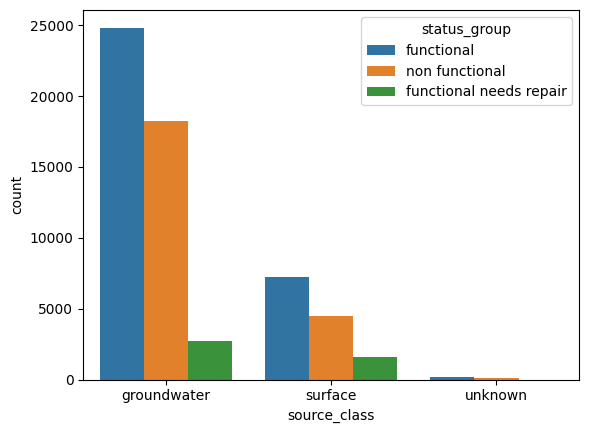

In [28]:
ax = sns.countplot(x='source_class', hue="status_group", data=df)

The majority of the water wells are groundwater, followed by surface and unknown. This suggests that groundwater is the most common source of water wells. The graph also shows that the majority of the water wells are functional, indicating that the water supply is reliable from groundwater.

In [29]:
df.drop(columns=['source_class', 'source_type'], inplace = True)

### Inspecting Management related columns

We have the columns 'management' and 'scheme_management. Let us see what is contained in the following columns

In [30]:
df['management'].value_counts()

management
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: count, dtype: int64

In [31]:
df['management_group'].value_counts()

management_group
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: count, dtype: int64

These two columns provide us with the same information in our analysis. Therefore we will opt to remain with the 'management' column as it is easier to manage.

In [32]:
df.groupby(['management_group', 'management']).count()

id  amount_tsh  date_recorded  funder  \
management_group management                                                   
commercial       company             685         685            685     663   
                 private operator   1971        1971           1971    1957   
                 trust                78          78             78      78   
                 water authority     904         904            904     836   
other            other               844         844            844     837   
                 other - school       99          99             99      99   
parastatal       parastatal         1768        1768           1768    1624   
unknown          unknown             561         561            561     533   
user-group       vwc               40507       40507          40507   37630   
                 water board        2933        2933           2933    2715   
                 wua                2535        2535           2535    2308   
                 wug                6515        6515           6515    6483   

                                   gps_height  installer  longitude  latitude  \
management_group management                                                     
commercial       company                  685        685        685       685   
                 private operator        1971       1971       1971      1971   
                 trust                     78         78         78        78   
                 water authority          904        904        904       904   
other            other                    844        844        844       844   
                 other - school            99         99         99        99   
parastatal       parastatal              1768       1768       1768      1768   
unknown          unknown                  561        561        561       561   
user-group       vwc                    40507      40507      40507     40507   
                 water board             2933       2933       2933      2933   
                 wua                     2535       2535       2535      2535   
                 wug                     6515       6515       6515      6515   

                                   wpt_name  num_private  ...  payment_type  \
management_group management                               ...                 
commercial       company                685          685  ...           685   
                 private operator      1971         1971  ...          1971   
                 trust                   78           78  ...            78   
                 water authority        904          904  ...           904   
other            other                  844          844  ...           844   
                 other - school          99           99  ...            99   
parastatal       parastatal            1768         1768  ...          1768   
unknown          unknown                561          561  ...           561   
user-group       vwc                  40507        40507  ...         40507   
                 water board           2932         2933  ...          2933   
                 wua                   2535         2535  ...          2535   
                 wug                   6514         6515  ...          6515   

                                   water_quality  quality_group  quantity  \
management_group management                                                 
commercial       company                     685            685       685   
                 private operator           1971           1971      1971   
                 trust                        78             78        78   
                 water authority             904            904       904   
other            other                       844            844       844   
                 other - school               99             99        99   
parastatal       parastatal                 1768           1768      1768

In [33]:
df.drop(columns=['management_group'], inplace = True)

### Inspecting Quantity related columns

In [34]:
df['quantity'].value_counts()

quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

In [35]:
df['quantity_group'].value_counts()

quantity_group
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

These two columns have the same information therefore i decided to drop the 'quantity_group' column

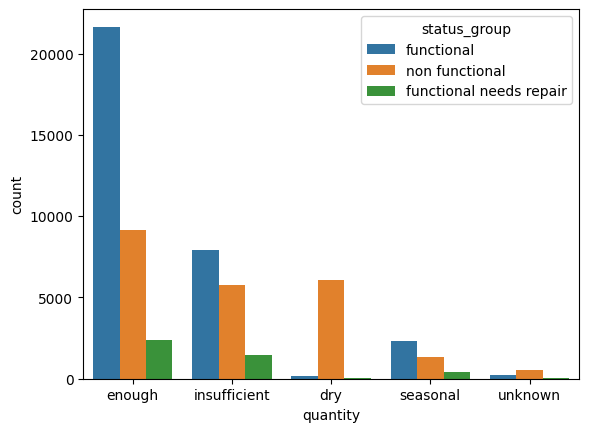

In [36]:
ax = sns.countplot(x='quantity', hue="status_group", data=df)

Clearly observable is the significant association between non-functionality and wells with ample water quantity. Dry or unknown water points exhibit a strong correlation with non-functionality. Conversely, wells categorized with sufficient water quantity show a greater likelihood of being functional.

In [37]:
df.drop(columns=['quantity_group'], inplace = True)

From this plot, we make the observation that most waterpoints are functional. However there is a significant number of non-functional waterpoints in Tanzania that need to be repaired.

### Inspecting water quality related columns

In [38]:
df['water_quality'].value_counts()

water_quality
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: count, dtype: int64

In [39]:
df['quality_group'].value_counts()

quality_group
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: count, dtype: int64

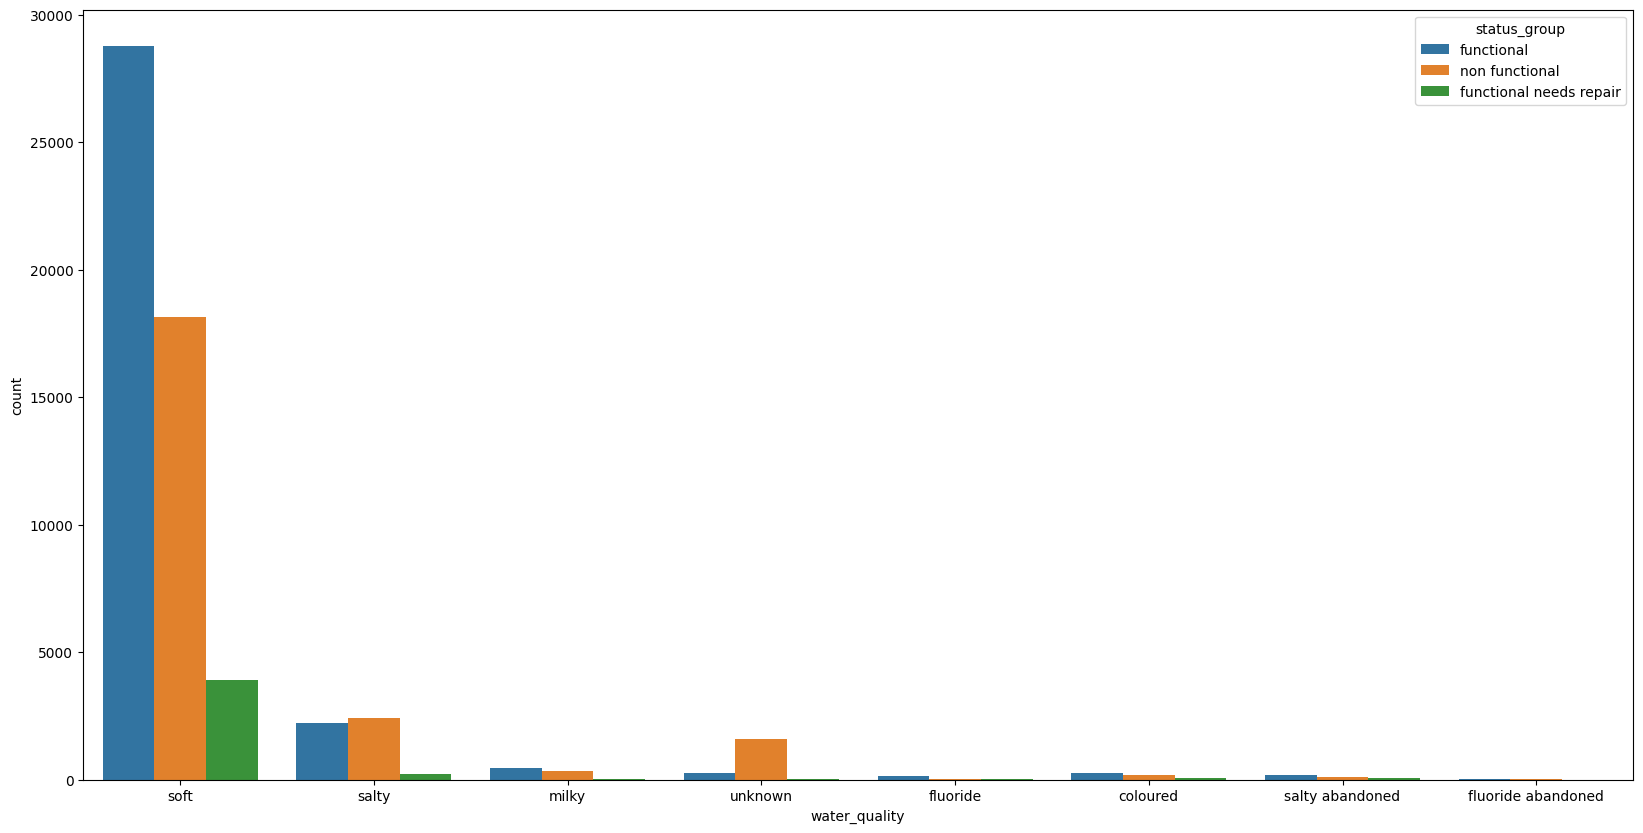

In [40]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df)

From this plot, the most common water quality is soft water in water wells in Tanzania.

In [41]:
df.drop(columns=['quality_group'], inplace = True)

### Inspecting payment related columns

In [42]:
df['payment'].value_counts()

payment
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: count, dtype: int64

In [43]:
df['payment_type'].value_counts()

payment_type
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: count, dtype: int64

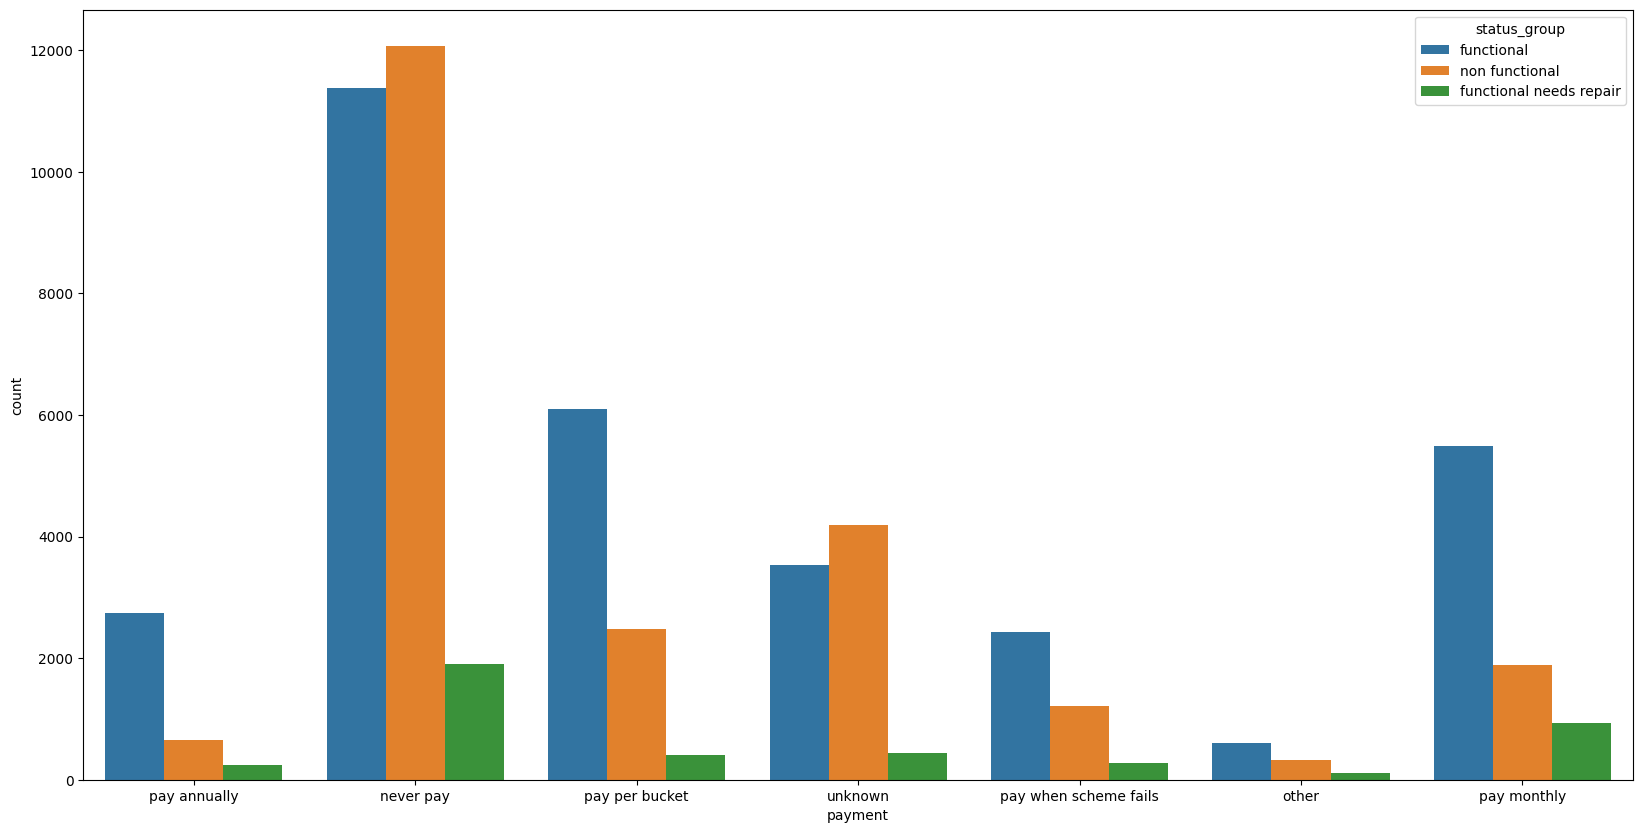

In [44]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='payment', hue="status_group", data=df)

I made an observation from this plot that there are a lot of non functional water points that are never paid for. Others opt to pay per bucket which indicates the situation in regards to finances in Tanzania. There is also Unknown payments which presents a challenge

In [45]:
df.drop(columns=['payment_type'], inplace = True)

### Inspecting extraction related columns

In [46]:
df['extraction_type'].value_counts()

extraction_type
gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: count, dtype: int64

In [47]:
df['extraction_type_group'].value_counts()

extraction_type_group
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: count, dtype: int64

In [48]:
df['extraction_type_class'].value_counts()

extraction_type_class
gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: count, dtype: int64

In [49]:
df.groupby(['extraction_type_class','extraction_type_group']).count()

id  amount_tsh  date_recorded  \
extraction_type_class extraction_type_group                                     
gravity               gravity                26780       26780          26780   
handpump              afridev                 1770        1770           1770   
                      india mark ii           2400        2400           2400   
                      india mark iii            98          98             98   
                      nira/tanira             8154        8154           8154   
                      other handpump           364         364            364   
                      swn 80                  3670        3670           3670   
motorpump             mono                    2865        2865           2865   
                      other motorpump          122         122            122   
other                 other                   6430        6430           6430   
rope pump             rope pump                451         451            451   
submersible           submersible             6179        6179           6179   
wind-powered          wind-powered             117         117            117   

                                             funder  gps_height  installer  \
extraction_type_class extraction_type_group                                  
gravity               gravity                 24704       26780      26780   
handpump              afridev                  1668        1770       1770   
                      india mark ii            2358        2400       2400   
                      india mark iii             98          98         98   
                      nira/tanira              7899        8154       8154   
                      other handpump            353         364        364   
                      swn 80                   3595        3670       3670   
motorpump             mono                     2577        2865       2865   
                      other motorpump           122         122        122   
other                 other                    6010        6430       6430   
rope pump             rope pump                 448         451        451   
submersible           submersible              5819        6179       6179   
wind-powered          wind-powered              112         117        117   

                                             longitude  latitude  wpt_name  \
extraction_type_class extraction_type_group                                  
gravity               gravity                    26780     26780     26779   
handpump              afridev                     1770      1770      1770   
                      india mark ii               2400      2400      2400   
                      india mark iii                98        98        98   
                      nira/tanira                 8154      8154      8154   
                      other handpump               364       364       364   
                      swn 80                      3670      3670      3670   
motorpump             mono                        2865      2865      2865   
                      other motorpump              122       122       122   
other                 other                       6430      6430      6429   
rope pump             rope pump                    451       451       451   
submersible           submersible                 6179      6179      6179   
wind-powered          wind-powered                 117       117       117   

                                             num_private  ...  \
extraction_type_class extraction_type_group               ...   
gravity               gravity                      26780  ...   
handpump              afridev                       1770  ...   
                      india mark ii                 2400  ...   
                      india mark iii                  98  ...   
                      nira/tanira                   8154  ...   
                      other handpum

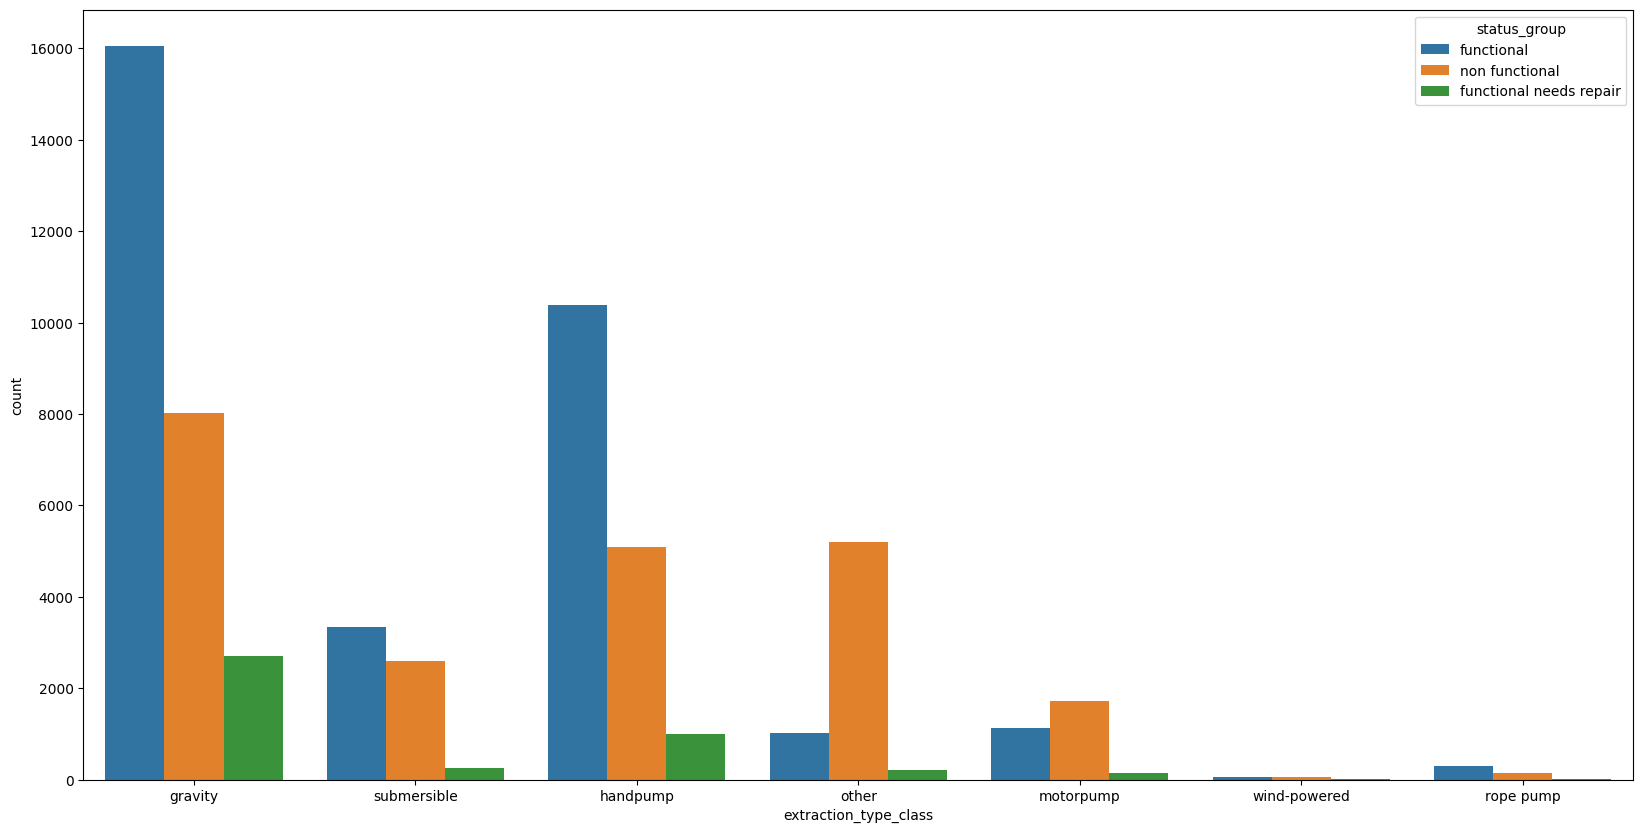

In [50]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_class', hue="status_group", data=df)

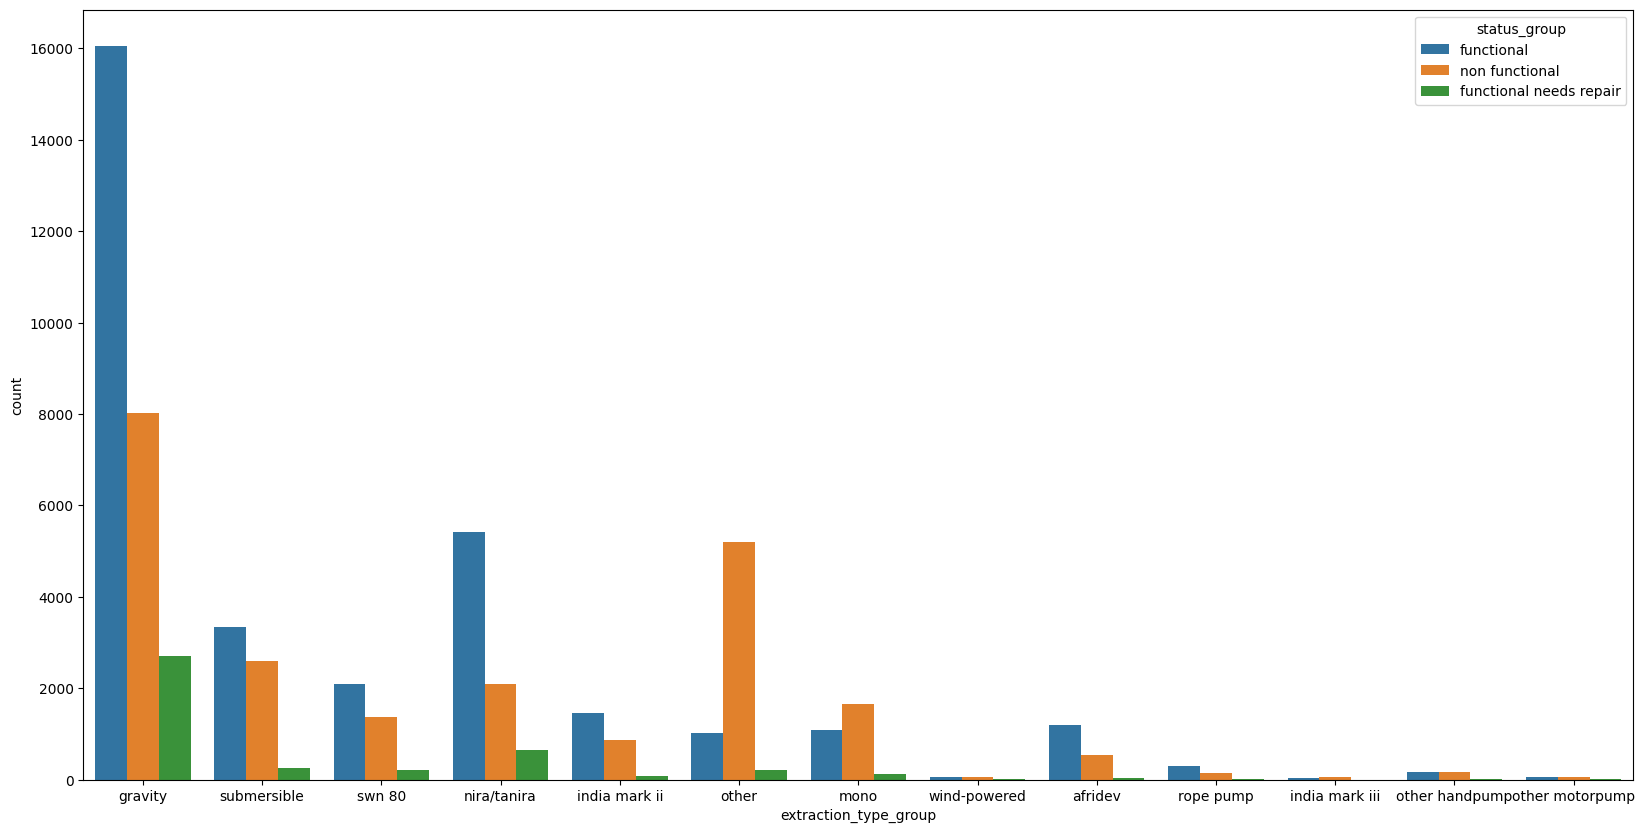

In [51]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_group', hue="status_group", data=df)

From this plot, we find that the most common method of water extraction for most water wells in Tanzania is via gravity. This finding will help save funds in building water wells with relatively few water wells require the use of pumps to produce water. This is likely to occur in arid areas of Tanzania.

In [52]:
df.drop(columns=['extraction_type'], inplace = True)

### Inspecting waterpoint related columns

In [53]:
df['waterpoint_type'].value_counts()

waterpoint_type
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: count, dtype: int64

In [54]:
df['waterpoint_type_group'].value_counts()

waterpoint_type_group
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: count, dtype: int64

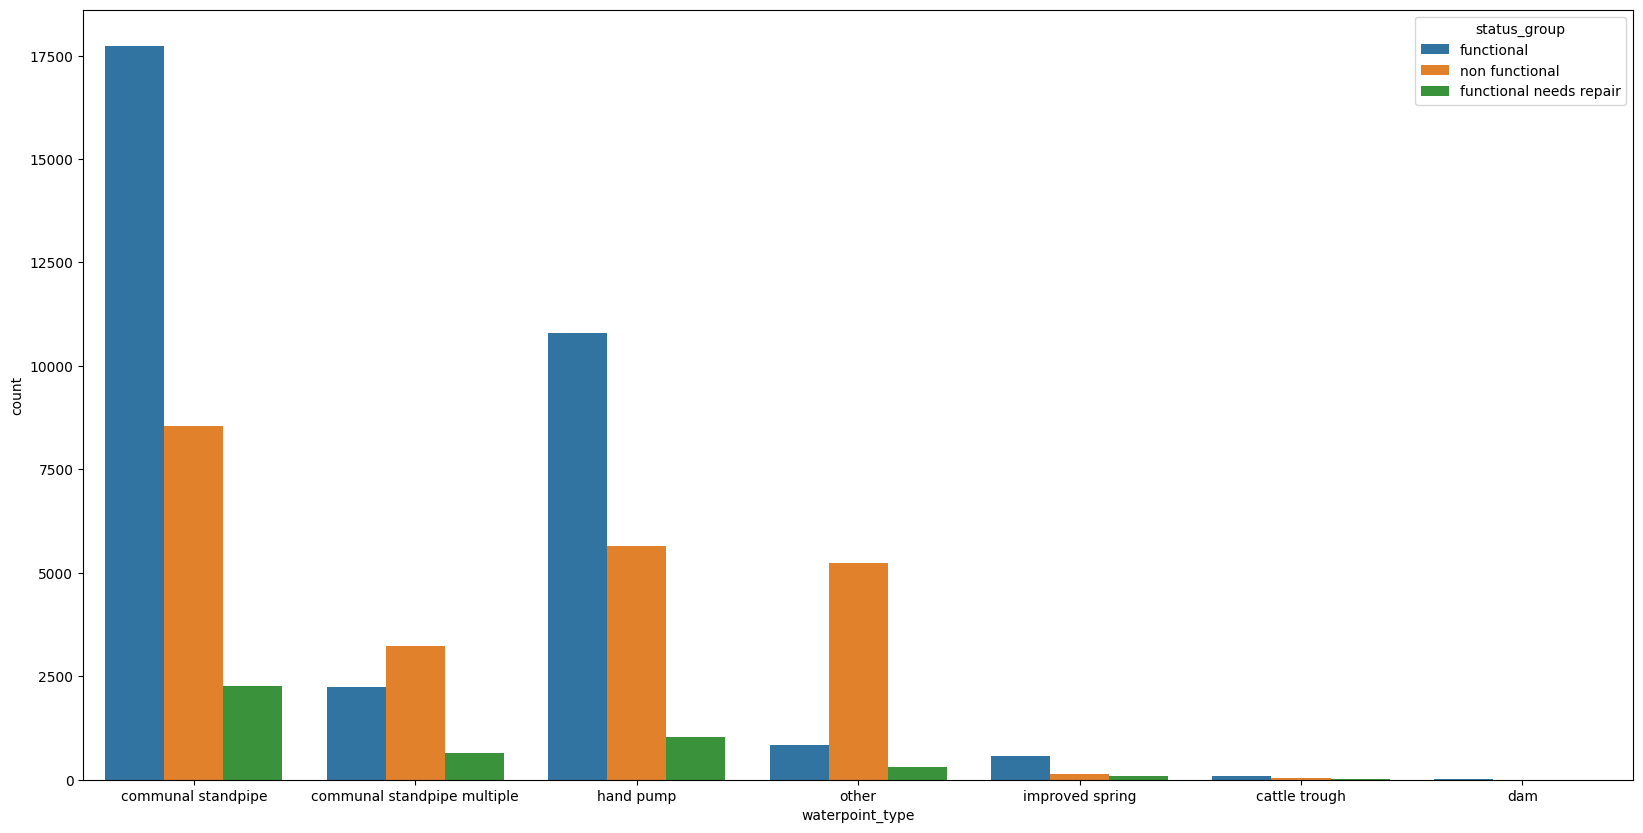

In [55]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=df)


It can be seen that waterpoint type has correlation with funtionality of water points. Such that, communal standpipe has higher possibility to have functional, although communal standpipe multiple and others have higher possibility for non-functionality.

### Inspecting scheme_name/id/region/region_code/wpt_name

In [56]:
df['wpt_name'].value_counts()

wpt_name
none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: count, Length: 37399, dtype: int64

In [57]:
df['scheme_name'].value_counts()

scheme_name
K                       682
Borehole                546
Chalinze wate           405
M                       400
DANIDA                  379
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: count, Length: 2695, dtype: int64

In [58]:
df.duplicated(subset='id', keep='first').sum()

0

In [59]:
df.drop(columns=['wpt_name','scheme_name','id','region_code'],inplace=True )


In [60]:
df['region'].value_counts()

region
Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: count, dtype: int64

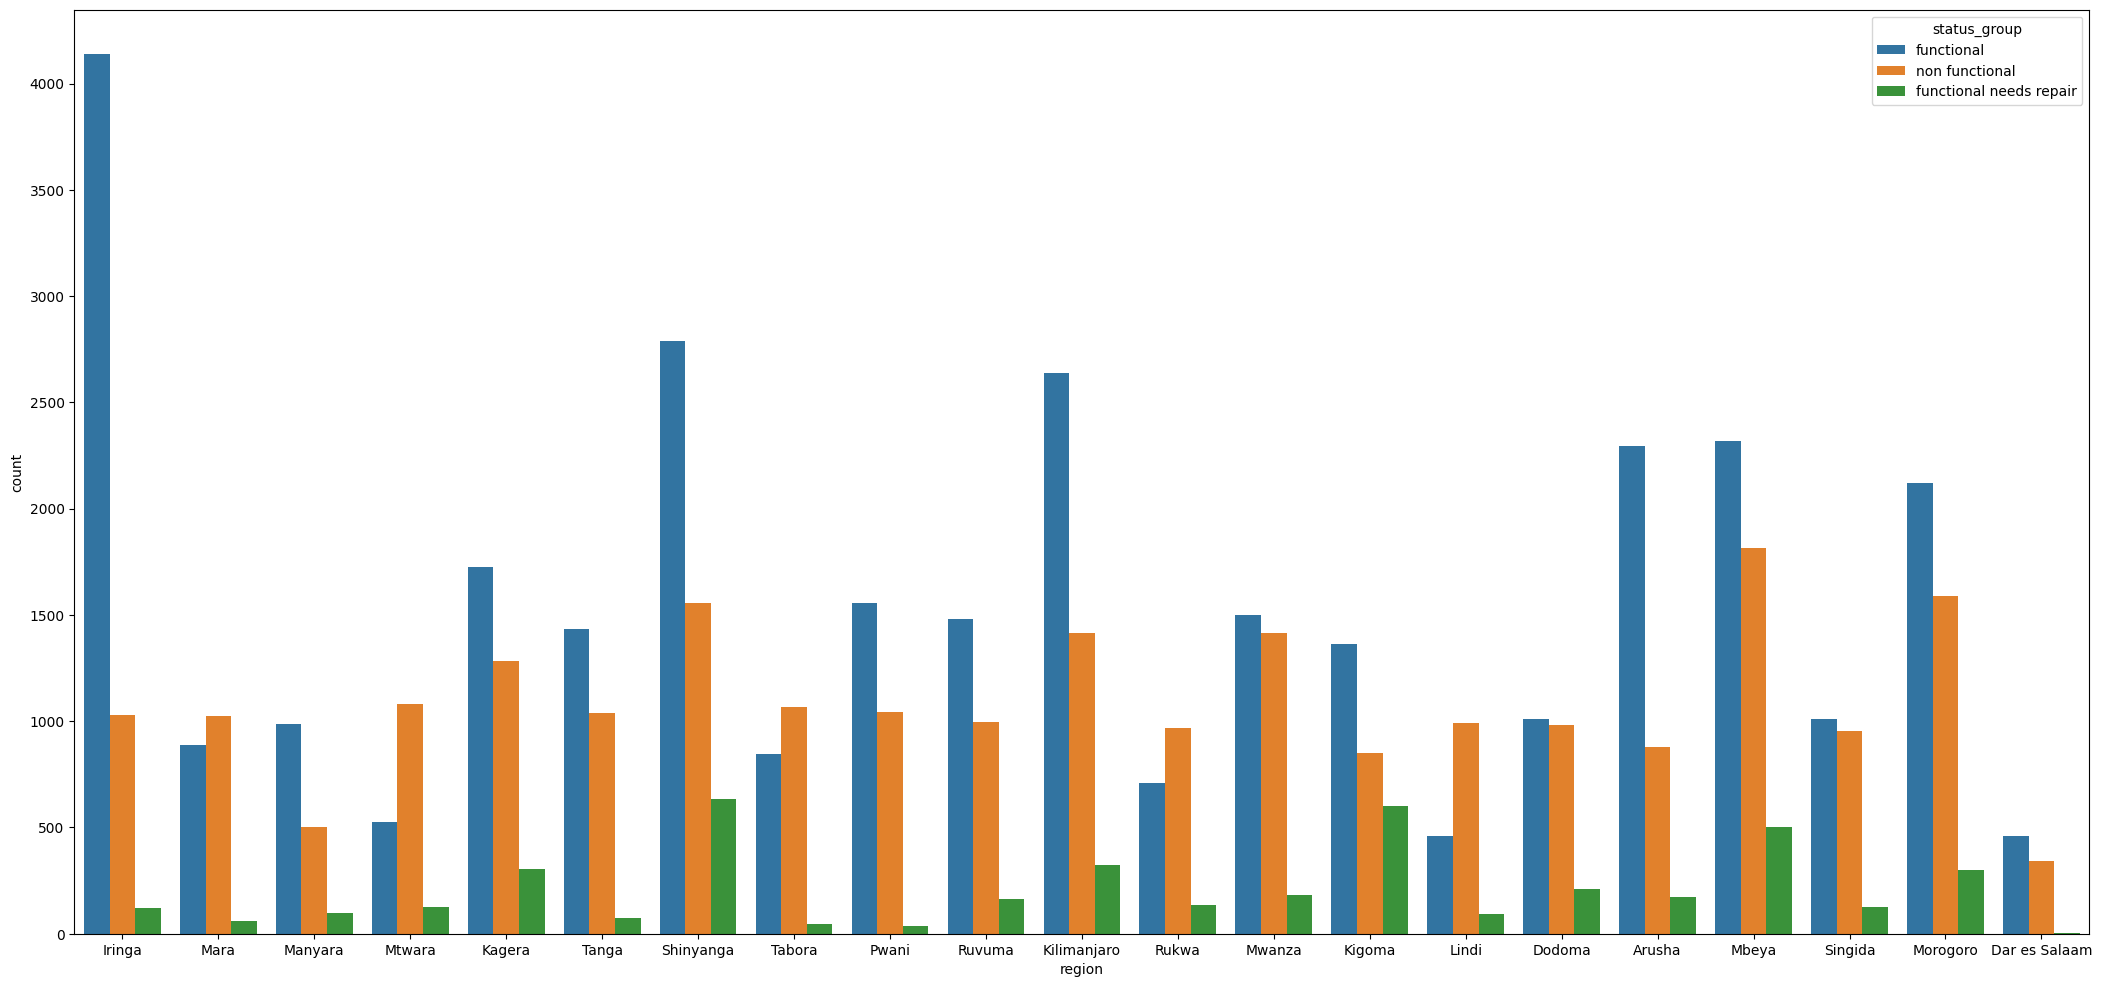

In [61]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='region', hue="status_group", data=df)

We can observe that the number of water wells varies significantly between regions in Tanzania. The highest number of water wells are in the regions of Iringa, Morogoro, and Shinyanga, while the lowest number of water wells are in the regions of Kigoma, Lindi, and Mtwara. This suggests that access to clean water is not uniform across Tanzania. 

### Inspecting public meeting column

In [62]:
df['public_meeting'].fillna(value=True,inplace=True)

### Inspecting permit column

In [63]:
df['permit'].fillna(value=True, inplace=True)

### Inspecting population column

In [64]:
df['population'].value_counts()


population
0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
6330        1
5030        1
656         1
948         1
788         1
Name: count, Length: 1049, dtype: int64

In [65]:

df.loc[df['population']==0].groupby('status_group').count()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,...,extraction_type_group,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,waterpoint_type_group,decade
status_group,,,,,,,,,,,,,,,,,,,,,
functional,11274,11274,10047,11274,11274,11274,11274,11274,11274,11071,...,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274
functional needs repair,1775,1775,1464,1775,1775,1775,1775,1775,1775,1775,...,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775
non functional,8332,8332,7752,8332,8332,8332,8332,8332,8332,8174,...,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332


In [66]:
df.loc[df['population']!=0].describe()

,amount_tsh,gps_height,longitude,latitude,num_private,district_code,population,construction_year
count,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000
mean,447.787681,969.889634,36.074387,-6.139781,0.740788,6.299456,281.087167,1996.908283
std,3706.770967,612.544787,2.586779,2.737733,15.288297,11.303334,564.687660,12.425377
min,0.000000,-90.000000,29.607122,-11.649440,0.000000,1.000000,1.000000,1960.000000
25%,0.000000,347.000000,34.715340,-8.388839,0.000000,2.000000,40.000000,1988.000000
50%,0.000000,1135.000000,36.706815,-5.750877,0.000000,3.000000,150.000000,2000.000000
75%,100.000000,1465.000000,37.940149,-3.597016,0.000000,5.000000,324.000000,2008.000000
max,350000.000000,2770.000000,40.345193,-1.042375,1776.000000,67.000000,30500.000000,2013.000000


In [67]:
df['population'].replace(to_replace = 0 , value =281, inplace=True)

In [68]:
df.sort_values(by='population', ascending=False).head(50).groupby('status_group').count()


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,...,extraction_type_group,extraction_type_class,management,payment,water_quality,quantity,source,waterpoint_type,waterpoint_type_group,decade
status_group,,,,,,,,,,,,,,,,,,,,,
functional,39,39,38,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
functional needs repair,4,4,3,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
non functional,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


### Other columns to drop

In [69]:
df.drop(columns=['construction_year','subvillage','num_private','date_recorded','amount_tsh'],inplace=True )

### Formatting Target values

In [70]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
df['status_group'] = df['status_group'].replace(target_status_group)

In [71]:
# we create new csv file to keep our work and call new cleaned data.
df.to_csv('clean_data.csv')

# Modelling

Now we begin our modelling, this will provide insights into the tanzania water wells project. We will implement different modeling techniques to gain valuable insights.

In [72]:
#Load cleaned dataset
df = pd.read_csv('clean_data.csv') 

In [73]:
# Create a separate dataframe
df1 = df.copy()

### Dividing the columns into numerical and categorical columns

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59400 non-null  int64  
 1   funder                 55763 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   installer              59400 non-null  object 
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   basin                  59400 non-null  object 
 7   region                 59400 non-null  object 
 8   district_code          59400 non-null  int64  
 9   lga                    59400 non-null  object 
 10  ward                   59400 non-null  object 
 11  population             59400 non-null  int64  
 12  public_meeting         59400 non-null  bool   
 13  scheme_management      55522 non-null  object 
 14  permit                 59400 non-null  bool   
 15  ex

In [75]:
df1.drop(columns=['lga','ward'],inplace=True ) 

In [76]:
df1['permit'] = df1['permit'].astype(bool).astype(int)

In [77]:
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int)

In [78]:
#Dividing into Numerical columns
num_col = ['population','public_meeting','permit','gps_height','longitude','latitude','district_code']
#Dividing into Categorical Columns
cat_col = ['extraction_type_group','basin','region','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade']

In [79]:
df1['status_group'].value_counts()

status_group
0    32259
2    22824
1     4317
Name: count, dtype: int64

We have compiled the data into three categories 
* 0 represents functional water points
* 1 represents functional but needs repair water points
* 2 represents non-functional water points

However we want more definitive categories

In [80]:
target_status_group = {0:1, 1: 1, 2 : 0}
df1['status_group'] = df1['status_group'].replace(target_status_group)

Now lets chck again.

In [81]:
df1['status_group'].value_counts()

status_group
1    36576
0    22824
Name: count, dtype: int64

## Baseline Model

We'll employ cross-validation as our primary technique to determine the most optimal outcome. This method offers convenience and clarity in understanding the process's progression. Additionally, to ensure the robustness of our results, we'll apply multiple models and verify the consistency of our findings

In [82]:
#import library
from sklearn.model_selection import train_test_split 
# Define the Target column
target ='status_group'
# Separating X and target column
used_cols = [c for c in df1.columns.tolist() if c not in [target]]
X=df1[used_cols]
y=df1[target]
# X and y to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Robust Scaler on Baseline Model

We will use the Robust Scaler to standardize variables, relying on statistics less sensitive to outliers, such as the Interquartile Range. As for encoding, we'll experiment with the target encoder, known for its effectiveness with features having higher cardinality or numerous unique values. Given our dataset's substantial unique values, our initial model for the baseline assessment will be Logistic Regression. This model aims to predict the likelihood of an instance belonging to a specific class by estimating its probability.

In [83]:
#Import necessary libraries
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import category_encoders as ce  
from sklearn.model_selection import cross_val_score, train_test_split
scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])


# choosing model
lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42)

# giving all values to pipeline
pipe = make_pipeline(preprocessor,lr)
pipe.fit(X_train, y_train)


# make predictions on training set
y_pred = pipe.predict(X_train)

# make predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:
TRAIN: 0.7670664983164983
TEST: 0.7704545454545455

Balanced Accuracy:
TRAIN: 0.7454500259992738
TEST: 0.7481602515202841


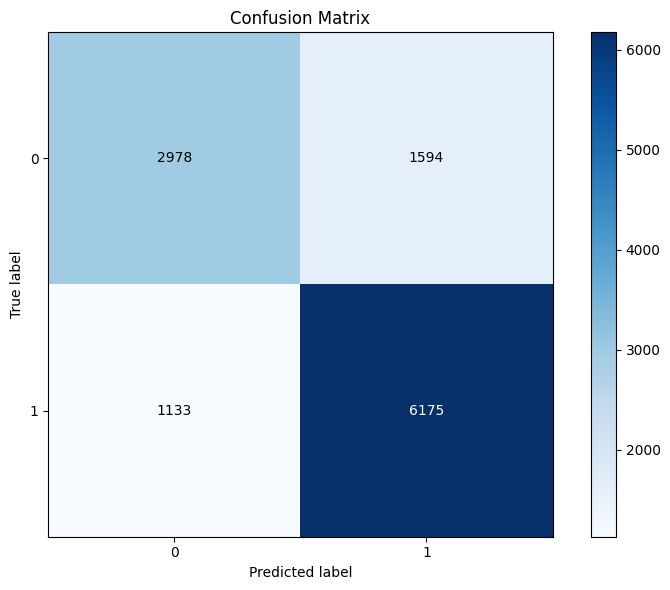

In [84]:
#import libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(y_test)
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


The matrix reveals insights: 1133 instances were wrongly predicted as non-functional when they were actually functional. Additionally, 1594 instances were predicted as functional, but in reality, they were non-functional.


### OneHot Encoder with LogReg

In [85]:

scaler = RobustScaler()
encoder = ce.OneHotEncoder(cols=cat_col)

num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)


preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

pipe = make_pipeline(preprocessor,lr)

scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

pipe.fit(X_train, y_train)

# make predictions on training set
y_pred = pipe.predict(X_train)

# make predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

0.8488657147568454 +/- 0.00270974225032191


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:
TRAIN: 0.7848274410774411
TEST: 0.7836700336700336

Balanced Accuracy:
TRAIN: 0.769529680010804
TEST: 0.7676637403083235


The model demonstrates reasonably similar performance between the training and test sets, achieving accuracies around 78%, indicating a relatively stable performance across both datasets. Additionally, the balanced accuracy scores, which account for class imbalances, reinforce the consistency of the model's performance across different classes in both training and test data.

### MinMax Scaler

In cases where the distribution deviates from a Gaussian shape or when the standard deviation is minimal, the min-max scaler tends to perform effectively. Consequently, we'll observe and contrast our scaler methods to determine their respective performances.

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
encoder = ce.WOEEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

# giving all values to pipeline
pipe = make_pipeline(preprocessor,lr)

scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

0.8294731154514601 +/- 0.003931405893907089


## Decision Tree Classifier

In [87]:
#import libraries
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5, 
                            random_state=42, class_weight='balanced')

pipe = make_pipeline(preprocessor,dt)

scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

0.7869422070366234 +/- 0.007860458672978196


### RandomForestClassifier

Random forest models mitigate overfitting by introducing randomness in multiple ways. They achieve this through constructing numerous decision trees (n_estimators), sampling data with replacement (bootstrapping), and selecting only a random subset of features at each node to determine the best split. By transforming non-homogeneous nodes into the best possible splits, these methods collectively help reduce the risk of overfitting in the model.

In [88]:
#import libraries
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1,class_weight='balanced')

pipe = make_pipeline(preprocessor,rf)

scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

0.9185816256764625 +/- 0.002693356782653815


### k-Neigbours Classifier

Initially, we're applying the k-Neighbors model without any parameter adjustments. The intent is to identify the nearest predefined number of training points in terms of distance from a new point and predict the label based on this proximity. Based on the outcomes obtained, we'll determine whether to proceed with refining the model through parameter tuning or retain it in its current state.

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

pipe = make_pipeline(preprocessor,knn)
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

0.8844331540094714 +/- 0.0027706188135411137


Given that the k-Neighbors model doesn't outperform our Random Forest model, we'll opt not to pursue parameter tuning for the k-Neighbors model and maintain our focus on the Random Forest approach.

In [90]:
from lightgbm import LGBMClassifier
#seting model
lgbm = LGBMClassifier(booster='gbtree', n_estimators=100, learning_rate=0.1, max_depth=10, colsample_bytree=0.4, max_delta_step=1)

#sending everthing in pipe
pipe = make_pipeline(preprocessor,lgbm)
pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 29268, number of negative: 18252
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1145
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.615909 -> initscore=0.472220
[LightGBM] [Info] Start training from score 0.472220
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Accuracy may be bad

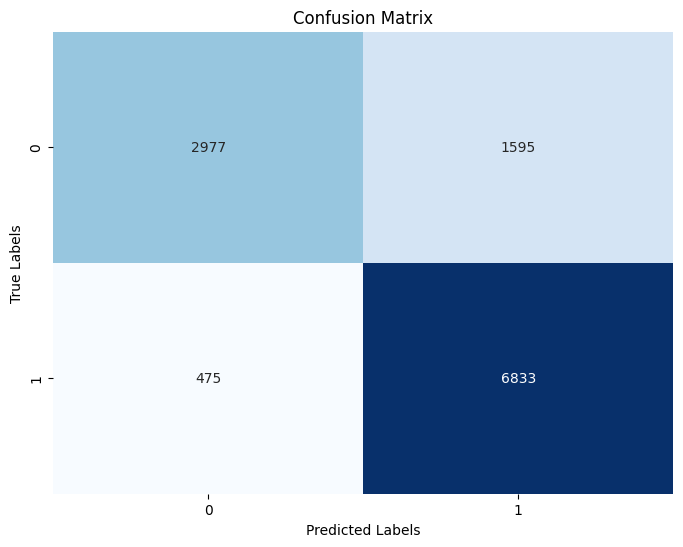

In [91]:
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Given the parameter adjustments, our model effectively managed the overfitting concern, yet the Random Forest model yielded superior results. As of now, we've opted to halt further refinements for this model. However, for potential future use, such as in competition submissions, we may revisit parameter tuning.

# Evaluation

## Best Fit Model

In [92]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,class_weight='balanced',
                            criterion = 'entropy',max_features = 'sqrt',min_samples_split = 10)
 
pipe = make_pipeline(preprocessor,rf)
pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.952293771043771
TEST: 0.8585858585858586

Balanced Accuracy:
TRAIN: 0.9484038750643917
TEST: 0.8455882669838684


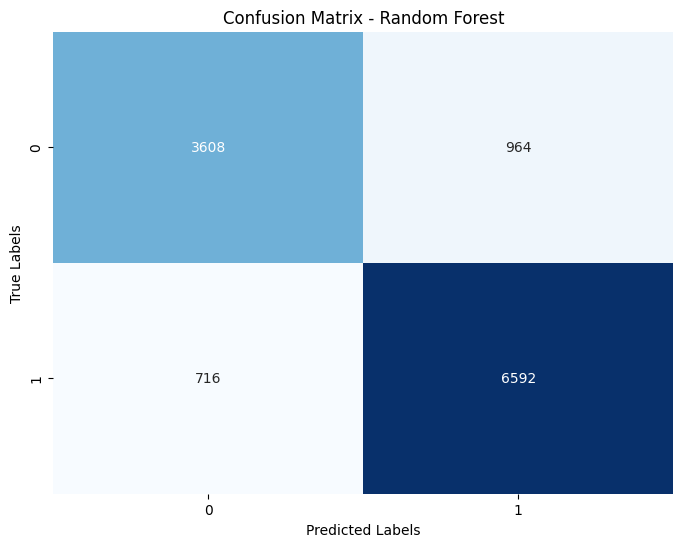

In [93]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

The Random Forest model excels due to its ability to handle complex relationships in the data, reducing overfitting through ensemble learning (combining multiple decision trees), and considering the impact of different features in the classification process. The notably high accuracy scores on both the training and test sets, along with substantial balanced accuracy scores, indicate that the model generalizes well to unseen data while maintaining a high level of predictive accuracy. This indicates the model's effectiveness in learning from the training data and making accurate predictions on new, unseen data, making it the best-performing model among those considered.

# Conclusion & Next Steps

We suggest the NGO consider employing this model to aid in prioritizing wells for resource allocation. Additionally, if they aim to advocate for better well construction in the future, focusing on essential features like total static head, installer, extraction type, and government permits could be pivotal, considering their significance in predicting well failure.
One limitation of our model is its reliance on columns with uncertain zero values that may represent nulls. To refine the model, obtaining more accurate data for this feature could enhance its effectiveness.
Moreover, the dataset spans from 2003, potentially lacking recent changes in well construction or maintenance practices. Addressing this gap would be crucial for future improvements in predictive accuracy.
Understanding budgetary constraints, integrating cost-related factors (e.g., well parts, replacement, transportation) into the model could mitigate organizational risks.
Lastly, collaboration with the NGO in disseminating educational resources and providing guidance on well maintenance could empower local communities, promoting the sustainability of improved water sources.
Thank you for the opportunity to work on this project.
